## CMPINF 2100 Week 13 | Introduction to Cross-Validation

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

We will use the Binary Classification Example from Week 12

In [4]:
df = pd.read_csv('../week_12/week_12_binary_classification.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      300 non-null    float64
 1   x2      300 non-null    float64
 2   x3      300 non-null    float64
 3   x4      300 non-null    float64
 4   x5      300 non-null    object 
 5   y       300 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 14.2+ KB


In [6]:
df.y.value_counts()

y
0    198
1    102
Name: count, dtype: int64

In [7]:
df.x5.value_counts()

x5
b    150
c     75
a     75
Name: count, dtype: int64

In [8]:
df.nunique()

x1    300
x2    300
x3    300
x4    300
x5      3
y       2
dtype: int64

### Review

We learned how to FIT logistic regression models AND how to calculatee etheeir performance on the TRAINING SET.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

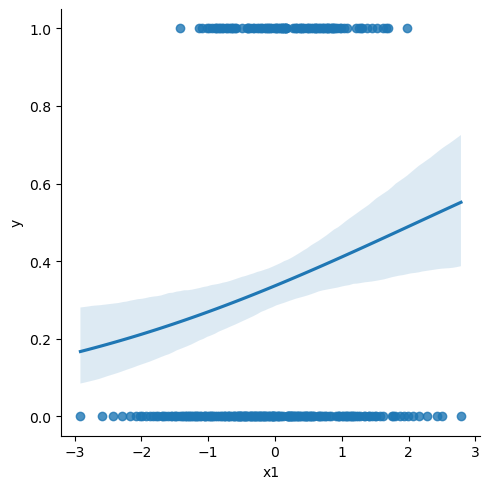

In [9]:
sns.lmplot( data=df, x='x1', y='y', logistic=True)

plt.show

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


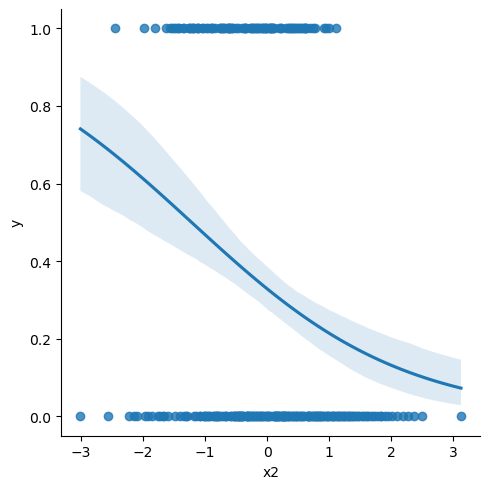

In [10]:
sns.lmplot(data=df, x='x2', y='y', logistic=True)

plt.show()

Sometimees it gets annoying for how long the visualization takes... so to speed it up, you can REMOVE the confidence interval.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


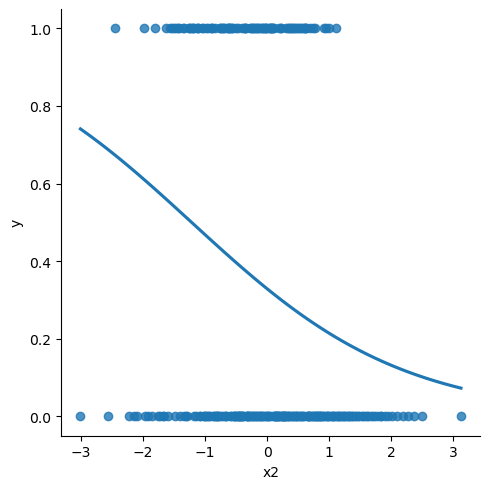

In [11]:
sns.lmplot(data=df, x='x2', y='y', logistic=True, ci=None)

plt.show()

We can also COLOR by a categorical input to examine the RELATIONSHIP between the EVENT PROBABILITY and the CONTINUOUS INPUT DEPENDS on GROUPS!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


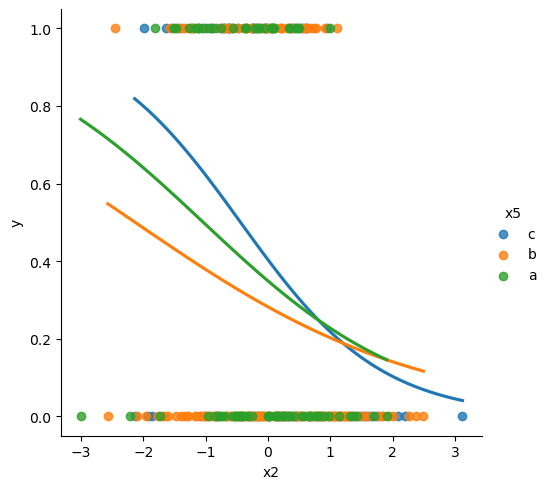

In [12]:
sns.lmplot(data=df, x='x2', y='y', hue='x5', logistic=True, ci=None)

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


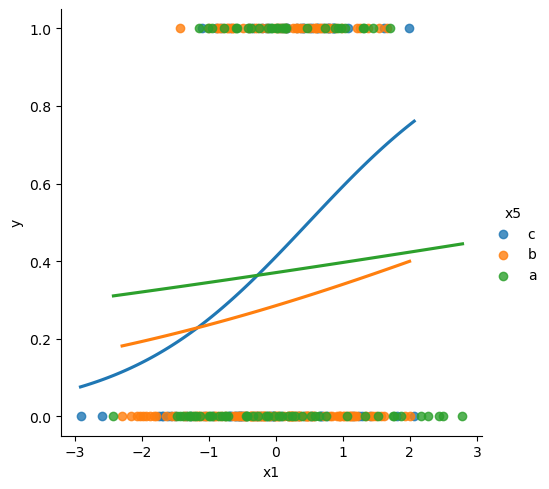

In [13]:
sns.lmplot(data=df, x='x1', y='y', hue='x5', logistic=True, ci=None)

plt.show()

We do NOT care how well the model PERFORMS on the DATA used to ESTIMATE the REGRESSION COEFFICENTS!

The data used to estimate the regression coeffficients (intercept and slopes) is referred to as the TRAINING SET!

The TRAINING SET does NOT tell us if we can **TRUST** the model on **NEW** data!

Past performance does NOT necessarily mean FUTURE performance will be the same!

We NEED **NEW** data in order to know if the model will continue to do well!

But we DO NOT have **NEW** data!

### Approximate New Data

We need to approximate TRAINING on HISTORICAL and then TESTING or VALIDATING on NEW or FUTURE data!

The approximation is known as **SPLITTING**. We will SPLIT the data we have into 2 portions. One portion is dedicated to TRAINING and the other portion is dedicated to TESTING or VALIDATING.

However, you should NOT SPLIT the data ONCE!

We need to know if our models are RELIABLE! If we SPLIT once and only once, we WILL NOT have VARIATION in the performance, we CANNOT calculate the AVERAGE performance!

Instead we will REPLICATE the process of SPLITTING the data into TRAINING and TEST SPLITS. By REPLICATING multiple times we can then AVERAGE the PERFORMANCE to get an ideea of the EXPEECTED behavior on NEW data!

We REPLICATED sampling at the start of the semester! That is exactly what we will do now!

But, at the beginning of the semester we were calling RANDOM NUMBER GENERATORS for specific DISTRIBUTIONS. We were generating BRAND NEW DATA many times.

Now, we will RANDOMLY SAMPLE **SUBSETS** of the data that we have. We are therefore RANDOMLY selecting ROWS!

This process of REPLICATING randomly sampling ROWS or RANDOMLY splitting the data is known as **RESAMPLING**.

We will specifically use a RESAMPLING procedure known as **K-fold Cross Validation**.

We will rely on FUNCTIONS to manage the RANDOM SAMPLING for us.

### K-fold Cross Validation

We will import the function from an scikit-learn module.

If we were working on a REGRESSION PROBLEM, we would use the following function:

In [14]:
from sklearn.model_selection import KFold

However, wee are working on a CLASSIFICATION problem... so we need to use a DIFFERENT function.

In [16]:
from sklearn.model_selection import StratifiedKFold

Both functions prefer to work with NumPy arrays compared to Pandas DataFrames.

Create a dataframe just of the INPUTS which we will then convert to NumPy.

In [17]:
input_df = df.drop(columns=['y']).copy()

In [18]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      300 non-null    float64
 1   x2      300 non-null    float64
 2   x3      300 non-null    float64
 3   x4      300 non-null    float64
 4   x5      300 non-null    object 
dtypes: float64(4), object(1)
memory usage: 11.8+ KB


We can convert the `input_df` DataFrame to a NumPy array using the `.to_numpy()` method.

In [19]:
type( input_df.to_numpy() )

numpy.ndarray

In [20]:
input_df.to_numpy().shape

(300, 5)

In [21]:
df.y

0      1
1      0
2      0
3      1
4      0
      ..
295    0
296    0
297    0
298    1
299    1
Name: y, Length: 300, dtype: int64

If we were working on a REGRESSION PROBLEM we would use the FOLLOWING syntax to create **5-fold CV**.

In [22]:
kf_a = KFold( n_splits=5, shuffle=True, random_state=101 )

This object understands how many times to SPLIT the data.

In [24]:
kf_a.get_n_splits()

5

But if you look closely... we have NOT specified the DATA to split! The `KFold()` function has only been INITIALIZED!

To SPLIT the data we need to call the `.split()` method and provide the INPUT NumPy array!

In [25]:
kf_a.split( input_df.to_numpy() )

<generator object _BaseKFold.split at 0x000001C3B6B157B0>

The `KFold()` function therefore INITIALIZES HOW the data will be split but calling the `.split()` method DOES NOT return the SPLITS! The `KFold()` function is simular to the `range()` function!

In [26]:
range(4)

range(0, 4)

In [27]:
for iterating_variable in range(4):
    print( 'do something %d time' % iterating_variable )

do something 0 time
do something 1 time
do something 2 time
do something 3 time


But `.split()` method RETURNS 2 things! It returns a NumPy array holding the ROW INDICES for the TRAINING SET and a NumPy array holding the ROW INDICES for the TEST SET!

In [29]:
for train_id, test_id in kf_a.split( input_df.to_numpy() ):
    print('The training set has %d rows while test set has %d rows' % (train_id.size, test_id.size) )

The training set has 240 rows while test set has 60 rows
The training set has 240 rows while test set has 60 rows
The training set has 240 rows while test set has 60 rows
The training set has 240 rows while test set has 60 rows
The training set has 240 rows while test set has 60 rows


In [30]:
df.shape[0]

300

In [31]:
240 / 300

0.8

In [32]:
60 / 300

0.2

Thus, 5-fold Cross-Validation creates 80% of the data for TRAINING and 20% of the data for TESTING.

It repreats this 80/20 Train/Test split 5 times!

But, if you are working on a CLASSIFICATION problem, you instead need to use a Stratified Cross-Validation procedure.

Initializing the Stratified Cross-validation is very simular to the 'regular' cross-validation.

In [33]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

In [34]:
kf.get_n_splits()

5

Calling the `.split()` method for STRATIFIED proceedure requires providing the INPUT NumPy array **AND** the output array!

In [35]:
kf.split( input_df.to_numpy(), df.y.to_numpy() )

<generator object _BaseKFold.split at 0x000001C3B6B907B0>

The SPLITS are only accessible WITHIN a FOR-LOOP!

In [36]:
for train_id, test_id in kf.split( input_df.to_numpy(), df.y.to_numpy() ):
    print('The training set has %d rows while the test set has %d rows' % (train_id.size, test_id.size) )

The training set has 240 rows while the test set has 60 rows
The training set has 240 rows while the test set has 60 rows
The training set has 240 rows while the test set has 60 rows
The training set has 240 rows while the test set has 60 rows
The training set has 240 rows while the test set has 60 rows


### Execute the Cross-Validation

We will execute the cross-validation and STORE the SPLITS. This way we can VISUALIZE which data points are used in the TRAINING SPLITS and which data points are used in the TESTING splits.

let's begin by initializing LISTS that will store the SPLITS.

In [37]:
train_list = []

In [38]:
test_list = []

Let's now APPLY the SPLITS to SUBSET the rows and thus identify the TRAIN and TEST splits!

In [40]:
for train_id, test_id in kf.split( input_df.to_numpy(), df.y.to_numpy() ):
    train_list.append( df.reset_index().iloc[ train_id, :].copy() )
    test_list.append( df.reset_index().iloc[ test_id, :].copy() )

In [41]:
len( train_list )

6

In [42]:
len( test_list )

5

We SPLIT the data 5 times therefore we have 5 sets of TRAINING and TESTING data sets!

In [43]:
[ fold.shape[0] for fold in train_list ]

[240, 240, 240, 240, 240, 240]

In [44]:
[ fold.shape[0] for fold in test_list ]

[60, 60, 60, 60, 60]

In [45]:
train_list[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 299
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   240 non-null    int64  
 1   x1      240 non-null    float64
 2   x2      240 non-null    float64
 3   x3      240 non-null    float64
 4   x4      240 non-null    float64
 5   x5      240 non-null    object 
 6   y       240 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 15.0+ KB


In [46]:
test_list[0]

,index,x1,x2,x3,x4,x5,y
3,3,1.659924,0.735156,-0.210541,-2.534105,b,1
9,9,-0.799057,0.643242,-1.213934,0.419669,a,0
10,10,-1.427914,-0.252610,0.858486,-0.967152,a,0
11,11,1.762445,-0.965097,2.109188,-0.776639,a,0
14,14,-0.120715,-0.334113,-1.586050,0.656370,a,0
21,21,0.332847,1.177897,2.207805,-2.160140,c,0
27,27,0.457674,1.062408,-0.709267,-1.443586,b,0
29,29,0.716445,1.839229,-1.168495,0.297894,b,0
37,37,0.011406,-0.359493,0.475248,0.490704,a,1
41,41,1.293574,0.484688,-0.336656,2.039898,a,1


In [47]:
test_list[0].head()

,index,x1,x2,x3,x4,x5,y
3,3,1.659924,0.735156,-0.210541,-2.534105,b,1
9,9,-0.799057,0.643242,-1.213934,0.419669,a,0
10,10,-1.427914,-0.252610,0.858486,-0.967152,a,0
11,11,1.762445,-0.965097,2.109188,-0.776639,a,0
14,14,-0.120715,-0.334113,-1.586050,0.656370,a,0


Let's now add a column FOR the FOLD ID or the number of times we SPLIT the data.

In [48]:
for fold_id in range( len(train_list) ):
    train_list[fold_id]['fold_id'] = fold_id + 1

In [49]:
train_list[0]

,index,x1,x2,x3,x4,x5,y,fold_id
0,0,1.077412,-0.991094,0.208610,-1.019744,c,1,1
1,1,-0.637747,-0.307506,-1.794250,1.189993,b,0,1
2,2,1.345143,-1.075281,1.685044,0.167879,b,0,1
4,4,1.182378,1.599140,-0.301995,1.206648,b,0,1
5,5,-1.474407,-0.526312,0.489012,-1.975302,a,0,1
...,...,...,...,...,...,...,...,...
294,294,-0.607473,0.176842,-0.004159,-0.470902,b,0,1
295,295,1.239739,1.572756,0.610548,1.402896,c,0,1
296,296,-0.528292,3.120873,0.357688,-0.599724,c,0,1
297,297,0.256334,1.293508,0.023925,-0.996928,b,0,1


In [50]:
for fold_id in range( len(test_list) ):
    test_list[fold_id]['fold_id'] = fold_id + 1

In [51]:
test_list[0].head()

,index,x1,x2,x3,x4,x5,y,fold_id
3,3,1.659924,0.735156,-0.210541,-2.534105,b,1,1
9,9,-0.799057,0.643242,-1.213934,0.419669,a,0,1
10,10,-1.427914,-0.252610,0.858486,-0.967152,a,0,1
11,11,1.762445,-0.965097,2.109188,-0.776639,a,0,1
14,14,-0.120715,-0.334113,-1.586050,0.656370,a,0,1


Combine everything together.

In [52]:
train_splits_df = pd.concat( train_list, ignore_index=True )

In [53]:
test_splits_df = pd.concat( test_list, ignore_index=True )

In [54]:
train_splits_df

,index,x1,x2,x3,x4,x5,y,fold_id
0,0,1.077412,-0.991094,0.208610,-1.019744,c,1,1
1,1,-0.637747,-0.307506,-1.794250,1.189993,b,0,1
2,2,1.345143,-1.075281,1.685044,0.167879,b,0,1
3,4,1.182378,1.599140,-0.301995,1.206648,b,0,1
4,5,-1.474407,-0.526312,0.489012,-1.975302,a,0,1
...,...,...,...,...,...,...,...,...
1435,293,0.098664,-1.036747,0.166541,0.541723,a,1,6
1436,294,-0.607473,0.176842,-0.004159,-0.470902,b,0,6
1437,295,1.239739,1.572756,0.610548,1.402896,c,0,6
1438,297,0.256334,1.293508,0.023925,-0.996928,b,0,6


In [55]:
test_splits_df

,index,x1,x2,x3,x4,x5,y,fold_id
0,3,1.659924,0.735156,-0.210541,-2.534105,b,1,1
1,9,-0.799057,0.643242,-1.213934,0.419669,a,0,1
2,10,-1.427914,-0.252610,0.858486,-0.967152,a,0,1
3,11,1.762445,-0.965097,2.109188,-0.776639,a,0,1
4,14,-0.120715,-0.334113,-1.586050,0.656370,a,0,1
...,...,...,...,...,...,...,...,...
295,275,-1.052980,-0.289242,-0.462194,-0.381012,b,0,5
296,281,-0.275751,-0.274525,0.329618,-0.489451,b,1,5
297,291,-2.292399,1.076723,-0.222596,0.810004,b,0,5
298,296,-0.528292,3.120873,0.357688,-0.599724,c,0,5


In [63]:
train_splits_df.rename(columns={'index': 'rowid'}, inplace=True)

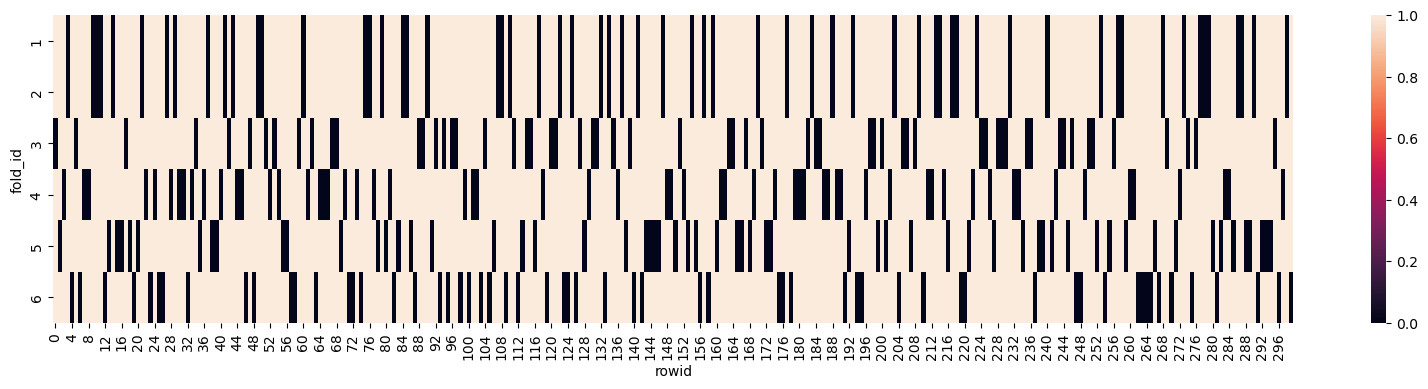

In [64]:
fig, ax = plt.subplots(figsize=(20, 4))

sns.heatmap(data=pd.crosstab( train_splits_df.fold_id, train_splits_df.rowid ), ax=ax)

plt.show()

Let's confirm this is the case by focusing on `fold_id==2`.

In [65]:
train_splits_df.loc[ train_splits_df.fold_id == 2, : ]

,rowid,x1,x2,x3,x4,x5,y,fold_id
240,0,1.077412,-0.991094,0.208610,-1.019744,c,1,2
241,1,-0.637747,-0.307506,-1.794250,1.189993,b,0,2
242,2,1.345143,-1.075281,1.685044,0.167879,b,0,2
243,4,1.182378,1.599140,-0.301995,1.206648,b,0,2
244,5,-1.474407,-0.526312,0.489012,-1.975302,a,0,2
...,...,...,...,...,...,...,...,...
475,294,-0.607473,0.176842,-0.004159,-0.470902,b,0,2
476,295,1.239739,1.572756,0.610548,1.402896,c,0,2
477,296,-0.528292,3.120873,0.357688,-0.599724,c,0,2
478,297,0.256334,1.293508,0.023925,-0.996928,b,0,2


`rowid==0` is NOT selecting for TRAINING in `fold_id==2`. But `rowid==0` IS selected for TRAINING in EVERY OTHER FOLD!

In [66]:
train_splits_df.loc[ (train_splits_df.fold_id != 2) & (train_splits_df.rowid ==0), : ]

,rowid,x1,x2,x3,x4,x5,y,fold_id
0,0,1.077412,-0.991094,0.20861,-1.019744,c,1,1
720,0,1.077412,-0.991094,0.20861,-1.019744,c,1,4
960,0,1.077412,-0.991094,0.20861,-1.019744,c,1,5
1200,0,1.077412,-0.991094,0.20861,-1.019744,c,1,6


In [70]:
train_splits_df.loc[ train_splits_df.rowid==0, : ]

,rowid,x1,x2,x3,x4,x5,y,fold_id
0,0,1.077412,-0.991094,0.20861,-1.019744,c,1,1
240,0,1.077412,-0.991094,0.20861,-1.019744,c,1,2
720,0,1.077412,-0.991094,0.20861,-1.019744,c,1,4
960,0,1.077412,-0.991094,0.20861,-1.019744,c,1,5
1200,0,1.077412,-0.991094,0.20861,-1.019744,c,1,6


The `rowid==0` is HELD OUT from the TRAINING set in `fold_id==2`! The `rowid==0` is part of the TEST SET in `fold_id==2`!

In [71]:
test_splits_df.rename(columns={'index': 'rowid'}, inplace=True)

In [72]:
test_splits_df.loc[ test_splits_df.rowid==0, : ]

,rowid,x1,x2,x3,x4,x5,y,fold_id
60,0,1.077412,-0.991094,0.20861,-1.019744,c,1,2


The ZEROTH row is HELD OUT **ONCE and ONLY once**!

This is TRUE for ALL observations!

In [73]:
test_splits_df.rowid.value_counts()

rowid
3      1
150    1
145    1
144    1
143    1
      ..
200    1
198    1
197    1
185    1
299    1
Name: count, Length: 300, dtype: int64

In [74]:
train_splits_df.rowid.value_counts()

rowid
0      5
152    5
191    5
192    5
194    5
      ..
122    4
125    4
132    4
134    4
298    4
Name: count, Length: 300, dtype: int64

In [78]:
test_splits_df.loc[ test_splits_df.fold_id == 3, :].head()

,rowid,x1,x2,x3,x4,x5,y,fold_id
120,2,1.345143,-1.075281,1.685044,0.167879,b,0,3
121,7,-0.318989,-1.021589,-1.178638,-0.058649,b,0,3
122,8,-0.751424,0.271994,-2.059709,-0.271215,b,0,3
123,22,-0.089428,0.753671,1.473587,-0.690805,b,0,3
124,24,-0.884016,0.585189,0.270356,1.714650,b,1,3


In [80]:
train_splits_df.loc[ train_splits_df.fold_id == 3, :]

,rowid,x1,x2,x3,x4,x5,y,fold_id
480,1,-0.637747,-0.307506,-1.794250,1.189993,b,0,3
481,2,1.345143,-1.075281,1.685044,0.167879,b,0,3
482,3,1.659924,0.735156,-0.210541,-2.534105,b,1,3
483,4,1.182378,1.599140,-0.301995,1.206648,b,0,3
484,6,2.271333,0.819373,2.478346,-0.152872,a,0,3
...,...,...,...,...,...,...,...,...
715,294,-0.607473,0.176842,-0.004159,-0.470902,b,0,3
716,296,-0.528292,3.120873,0.357688,-0.599724,c,0,3
717,297,0.256334,1.293508,0.023925,-0.996928,b,0,3
718,298,-0.628451,0.373513,0.038140,2.197234,b,1,3


This means CROSS-VALIDATION creates DIFFERENT training sets for you!

The TRAINING sets are RANDOMLY created by SUBSETTING the rows of the ENTIRE data set.

`5-fold` CV uses 80% of the data for TRAINING thus **MOST** of the training data are THE SAME across the folds.

However, 5-fold CV uses 20% of the data for TESTING and the 20% for TESTING is **DIFFERENT** in each fold!

Let's visualize these ideas

In [81]:
train_splits_df['from_set'] = 'training'

In [82]:
test_splits_df['from_set'] = 'testing'

In [83]:
all_folds = pd.concat([train_splits_df, test_splits_df], ignore_index=True)

In [84]:
all_folds

,rowid,x1,x2,x3,x4,x5,y,fold_id,from_set
0,0,1.077412,-0.991094,0.208610,-1.019744,c,1,1,training
1,1,-0.637747,-0.307506,-1.794250,1.189993,b,0,1,training
2,2,1.345143,-1.075281,1.685044,0.167879,b,0,1,training
3,4,1.182378,1.599140,-0.301995,1.206648,b,0,1,training
4,5,-1.474407,-0.526312,0.489012,-1.975302,a,0,1,training
...,...,...,...,...,...,...,...,...,...
1735,275,-1.052980,-0.289242,-0.462194,-0.381012,b,0,5,testing
1736,281,-0.275751,-0.274525,0.329618,-0.489451,b,1,5,testing
1737,291,-2.292399,1.076723,-0.222596,0.810004,b,0,5,testing
1738,296,-0.528292,3.120873,0.357688,-0.599724,c,0,5,testing


In [86]:
all_folds.groupby(['fold_id', 'from_set']).size().reset_index(name='num_rows')

,fold_id,from_set,num_rows
0,1,testing,60
1,1,training,240
2,2,testing,60
3,2,training,240
4,3,testing,60
5,3,training,240
6,4,testing,60
7,4,training,240
8,5,testing,60
9,5,training,240


Stratified Cross-Validation MAKES SURE the EVENT PROPORTION is ROUGHLY the SAME across the FOLDS!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


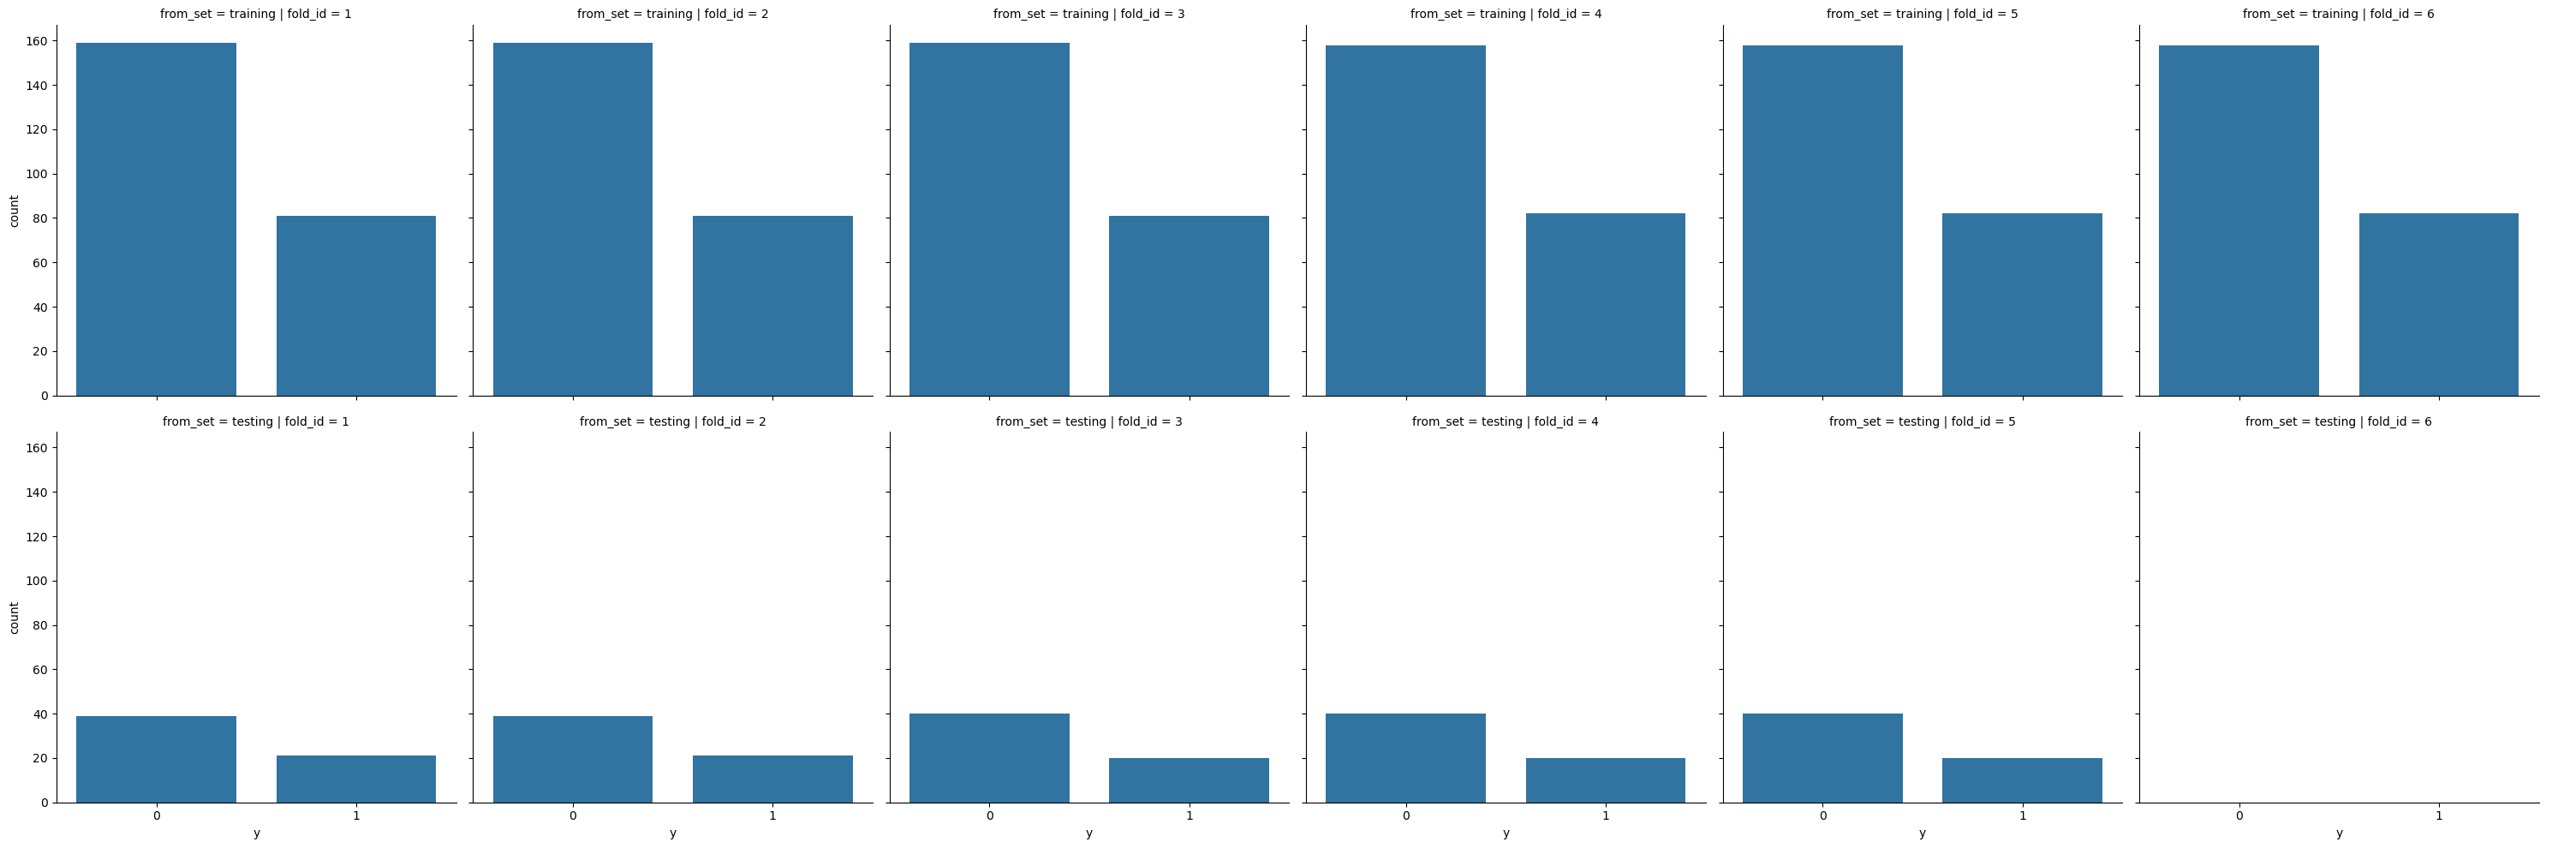

In [88]:
sns.catplot(data=all_folds, x='y', kind='count', row='from_set', col='fold_id')

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


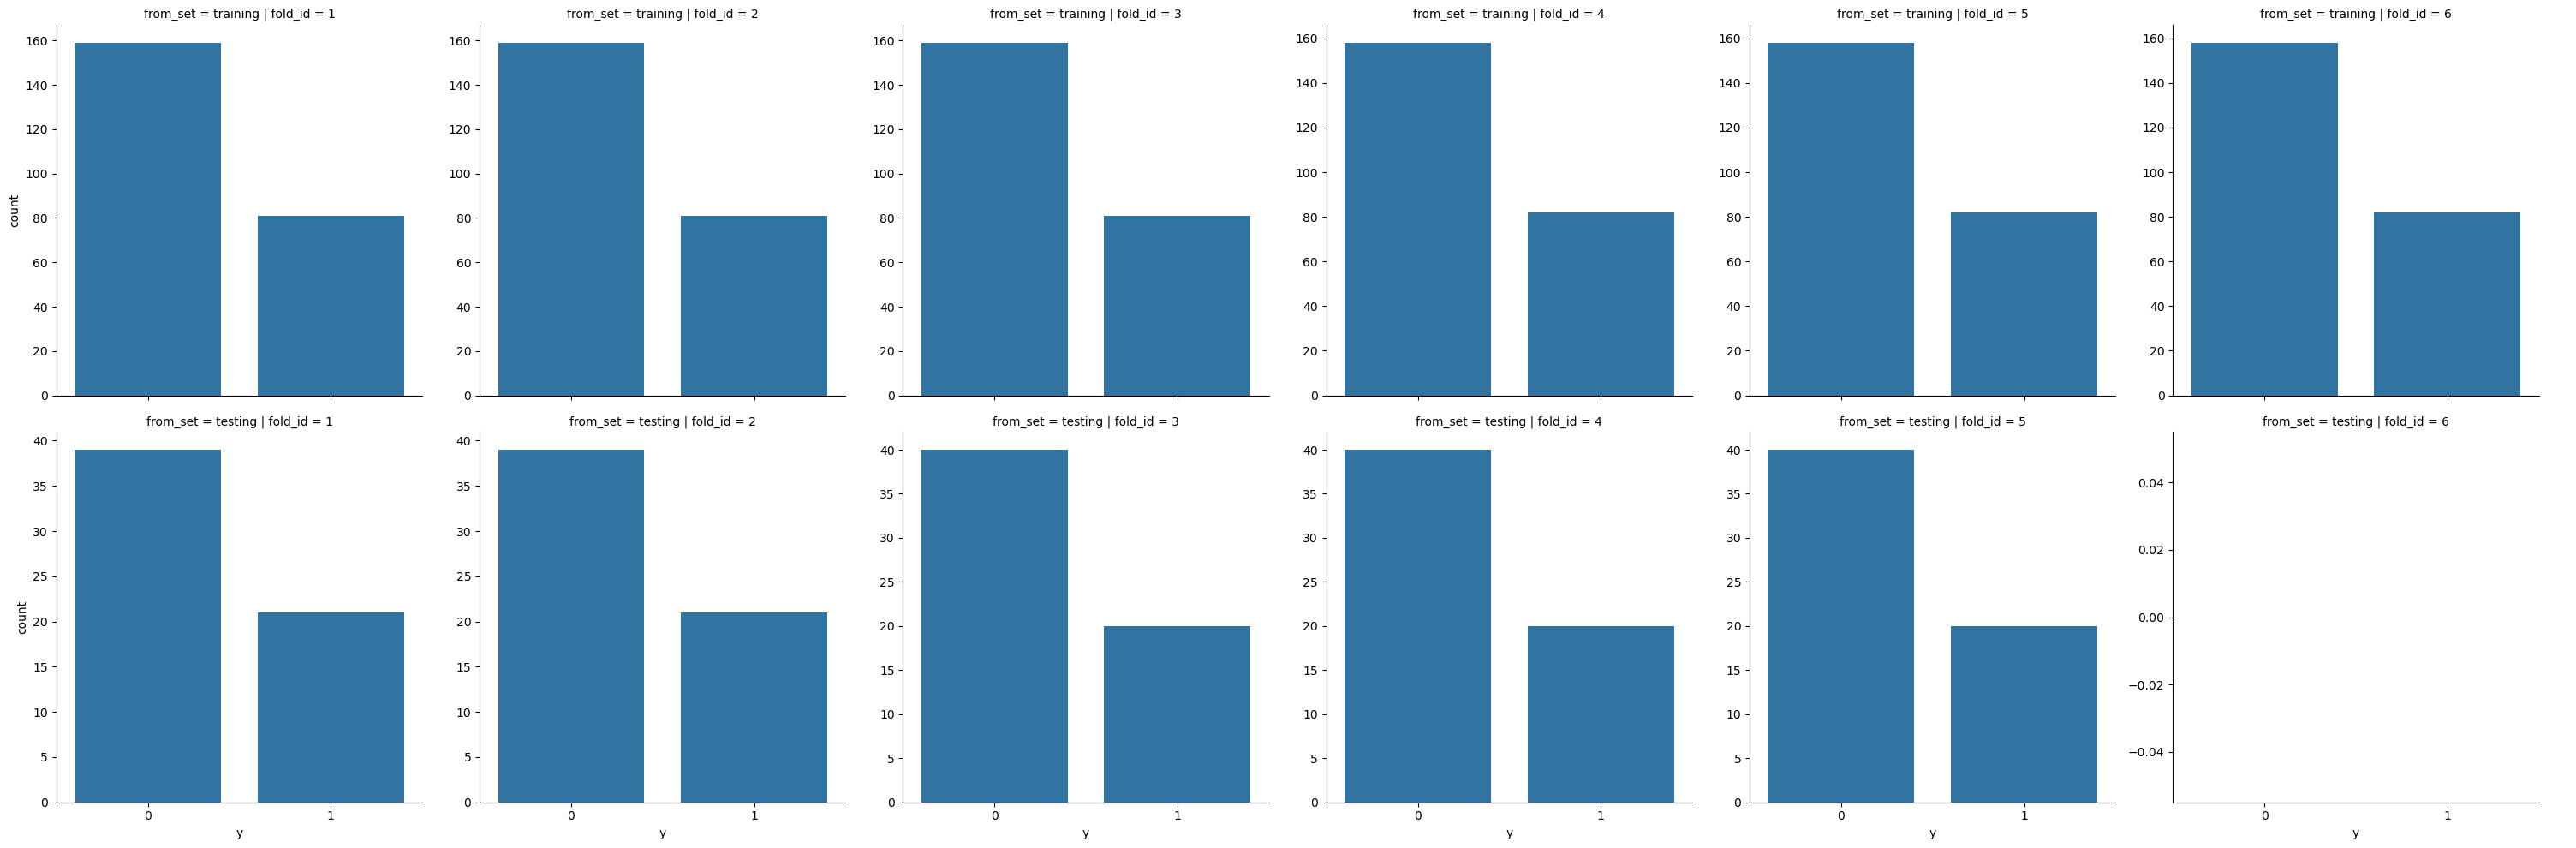

In [89]:
sns.catplot(data=all_folds, x='y', kind='count', row='from_set', col='fold_id',
            sharey=False)

plt.show()

In [91]:
df.y.value_counts(normalize=True)

y
0    0.66
1    0.34
Name: proportion, dtype: float64

In [92]:
df.y.mean()

0.34

C:\Users\Canye\AppData\Local\Temp\ipykernel_22536\2263075192.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data=all_folds, x='fold_id', y='y', kind='point', join=False, col='from_set')
C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


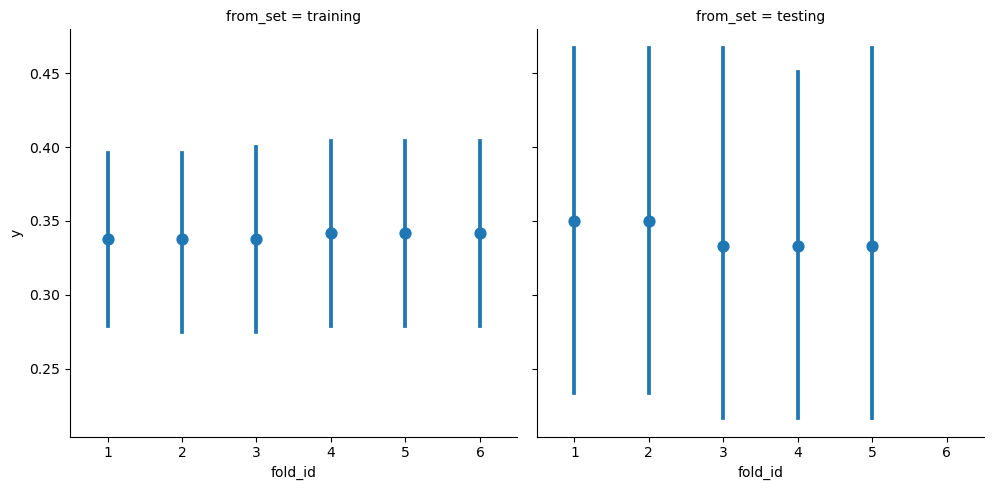

In [93]:
sns.catplot(data=all_folds, x='fold_id', y='y', kind='point', join=False, col='from_set')

plt.show()

Let's visualize the RELATIONSHIP between the EVENT probability and the INPUTS across the folds and train/test splits.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


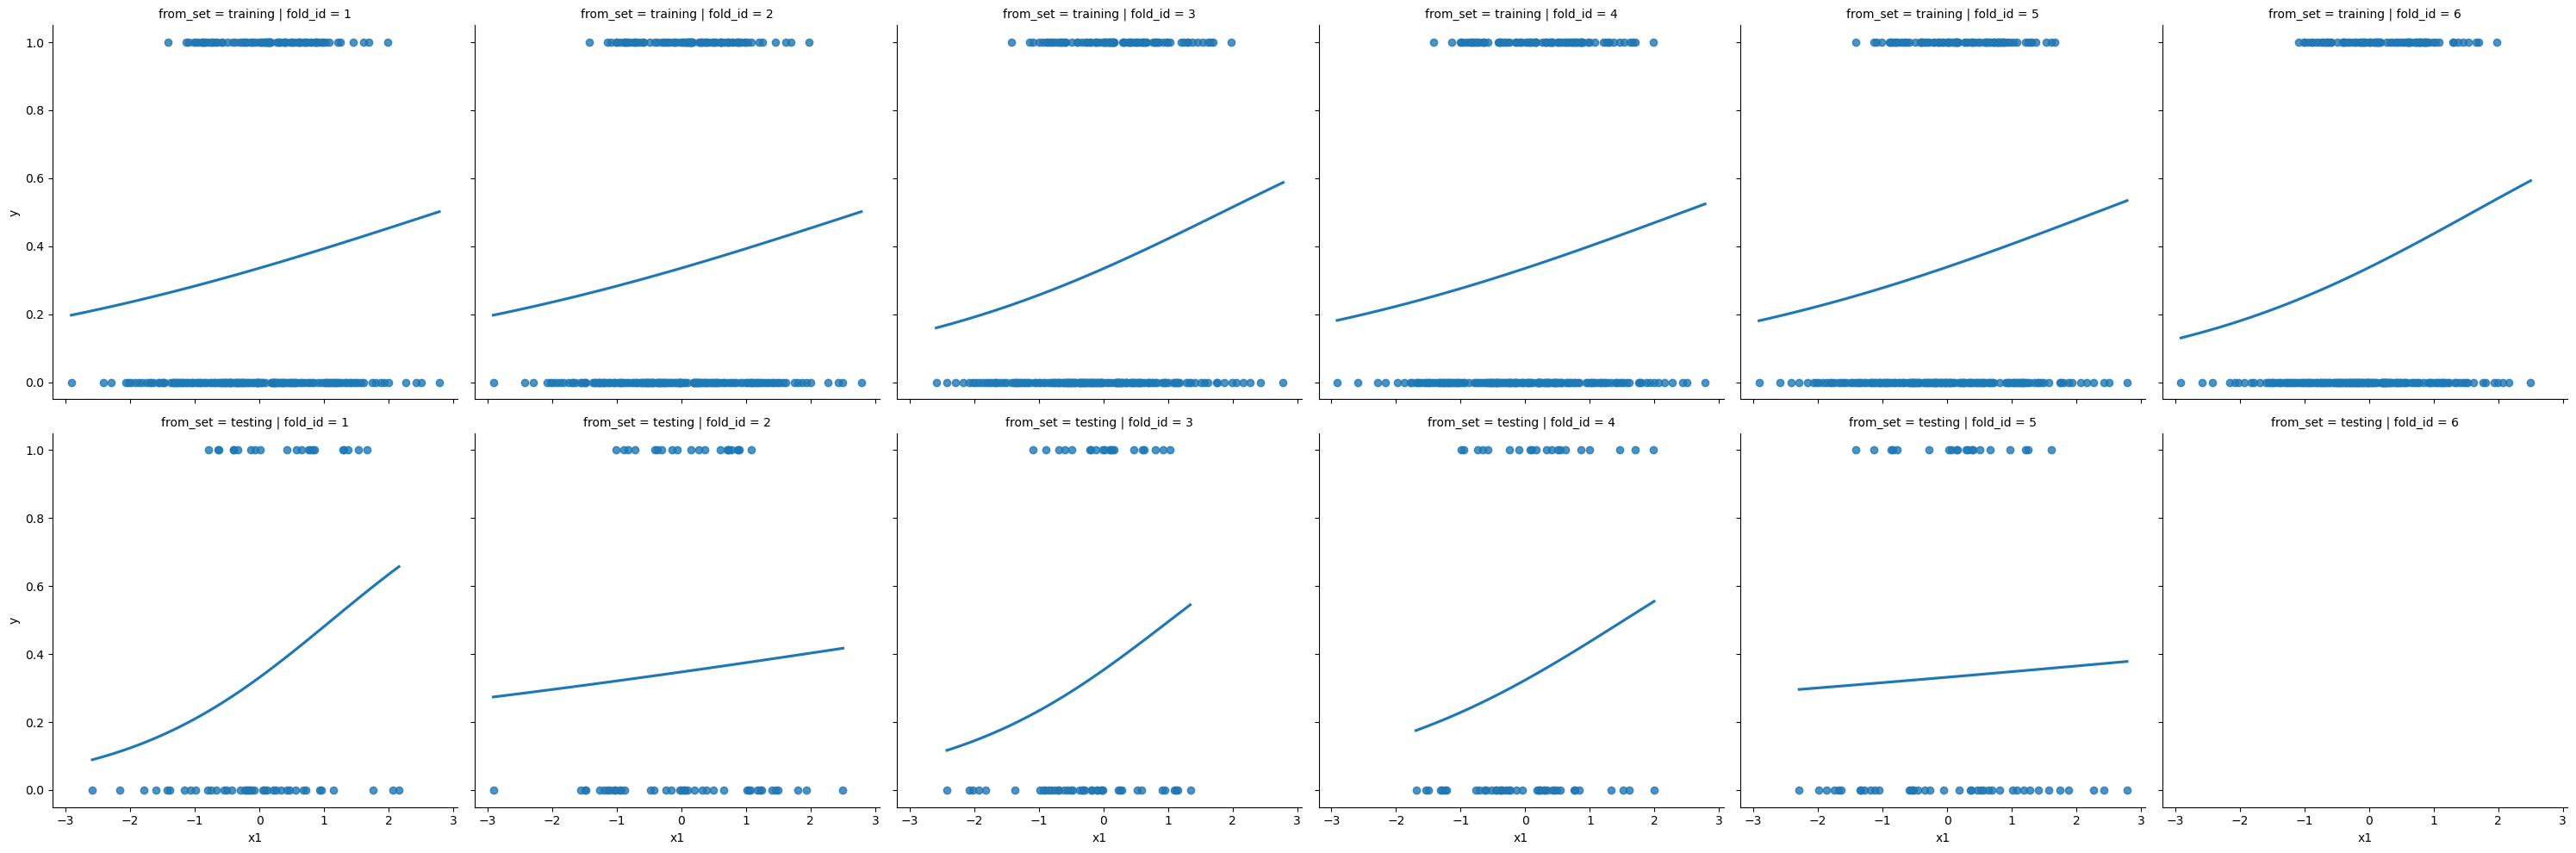

In [94]:
sns.lmplot(data=all_folds, x='x1', y='y', col='fold_id', row='from_set', logistic=True, ci=None)

plt.show()

You can use even more COMPLEX models that INTERACT continuous inputs with CATEGORICAL inputs!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


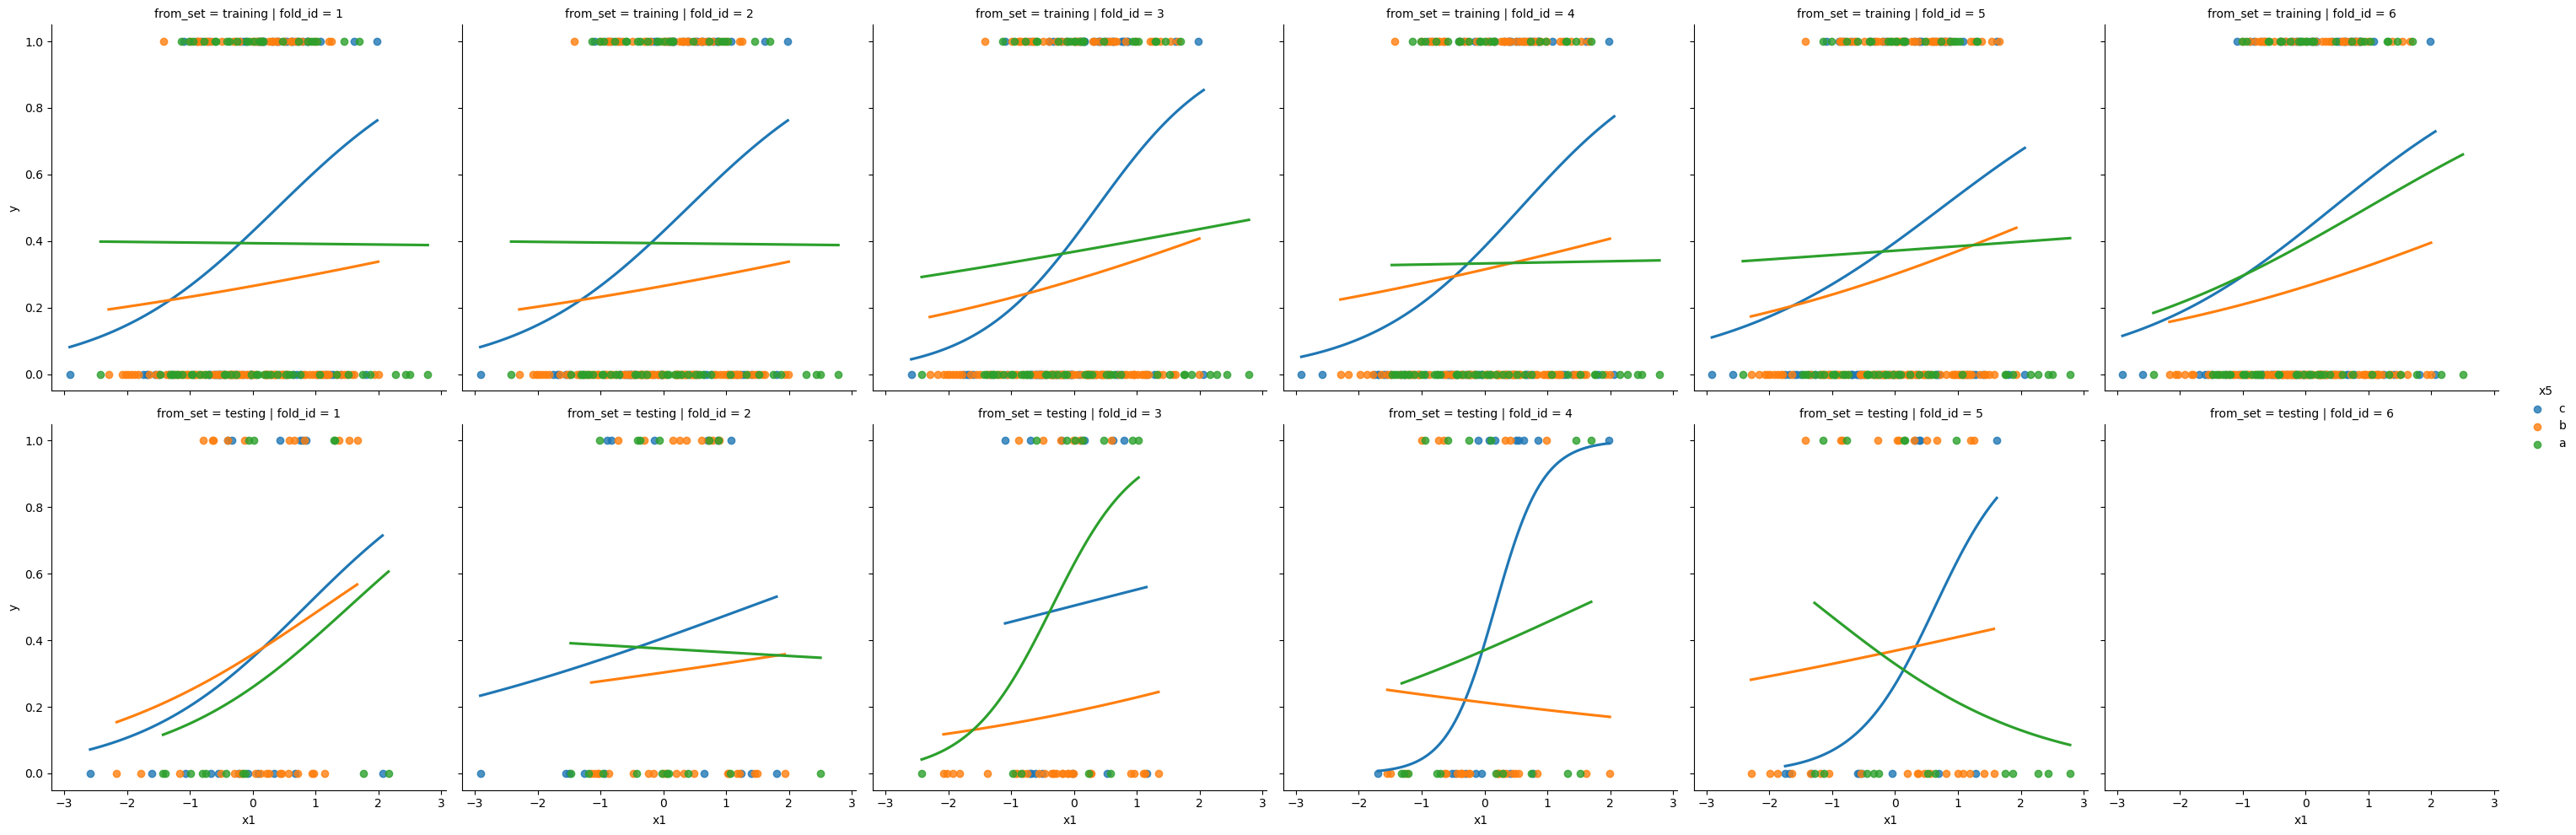

In [96]:
sns.lmplot(data=all_folds, x='x1', y='y', hue='x5', col='fold_id', row='from_set', logistic=True, ci=None)

plt.show()

### How do we use cross-validation:

There are 3 steps executed WITHIN each fold:

1. Fit the model on the FOLD'S TRAINING SET and thus ESTIMATE the model's regression COEFFICIENTS!
2. PREDICT the TEST SET using the fitted model and the TEST SET inputs.
3. Calculate the model's PERFORMANCE on the TEST SET using the model's PREDICTION and the observed TEST SET output!

This allows us to MEASURE if the TRENDS learned on the TRAINING SET **carry over** or are applicable to the TRENDS in **NEW** data **NOT** used for TRAINING!

We REPLICATE the process of SPLITTING the data multiple timees and thus REPLICATING FITTING and ASSESSING multiple times in order to estimate the RELIABILITY of the model!

**WHY DOES THIS MATTER**

We learned last week MORE FEATURES and thus MORE UNKNOWN REGRESSSION COEFFICIENTS will make a model appear to be better on the TRAINING SET!

The TRAINING SET performance does NOT necessarily reflect performance on NEW data!